In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, cross_val_score
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    auc
)
import joblib

pd.options.display.float_format = '{:.2f}'.format 

In [2]:
#Lendo dados
data_model = pd.read_parquet('../data/final/dados_modelo_pronto.parquet', engine='fastparquet')


In [3]:
data_model.head()

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DIAS_ATE_PAGAMENTO,INADIMPLENTE,DIAS_DE_ATRASO,...,NO_FUNCIONARIOS,MES_EMISSAO,REGIAO_CEP_Desconhecido,REGIAO_CEP_Nordeste,REGIAO_CEP_Norte,REGIAO_CEP_Sudeste,REGIAO_CEP_Sul,SEGMENTO_INDUSTRIAL_Indústria,SEGMENTO_INDUSTRIAL_PJ,SEGMENTO_INDUSTRIAL_Serviços
0,8784237149961904,2018-08-01,2018-08-17,2018-09-04,2018-09-04,100616.10,5.99,18,0,0,...,114.13,8,False,False,False,True,False,False,False,False
1,8784237149961904,2018-08-01,2018-08-22,2018-09-11,2018-09-11,89552.80,5.99,20,0,0,...,114.13,8,False,False,False,True,False,False,False,False
2,8784237149961904,2018-08-01,2018-08-23,2018-09-10,2018-09-10,94062.80,5.99,18,0,0,...,114.13,8,False,False,False,True,False,False,False,False
3,8784237149961904,2018-08-01,2018-08-23,2018-09-08,2018-09-10,102686.10,5.99,16,0,-2,...,114.13,8,False,False,False,True,False,False,False,False
4,8784237149961904,2018-08-01,2018-08-24,2018-09-11,2018-09-11,51393.00,5.99,18,0,0,...,114.13,8,False,False,False,True,False,False,False,False


In [4]:
#Alguns ajustes
data_model['NO_FUNCIONARIOS'] = data_model['NO_FUNCIONARIOS'].round(0).astype(int)


In [5]:
data_model.head()

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DIAS_ATE_PAGAMENTO,INADIMPLENTE,DIAS_DE_ATRASO,...,NO_FUNCIONARIOS,MES_EMISSAO,REGIAO_CEP_Desconhecido,REGIAO_CEP_Nordeste,REGIAO_CEP_Norte,REGIAO_CEP_Sudeste,REGIAO_CEP_Sul,SEGMENTO_INDUSTRIAL_Indústria,SEGMENTO_INDUSTRIAL_PJ,SEGMENTO_INDUSTRIAL_Serviços
0,8784237149961904,2018-08-01,2018-08-17,2018-09-04,2018-09-04,100616.10,5.99,18,0,0,...,114,8,False,False,False,True,False,False,False,False
1,8784237149961904,2018-08-01,2018-08-22,2018-09-11,2018-09-11,89552.80,5.99,20,0,0,...,114,8,False,False,False,True,False,False,False,False
2,8784237149961904,2018-08-01,2018-08-23,2018-09-10,2018-09-10,94062.80,5.99,18,0,0,...,114,8,False,False,False,True,False,False,False,False
3,8784237149961904,2018-08-01,2018-08-23,2018-09-08,2018-09-10,102686.10,5.99,16,0,-2,...,114,8,False,False,False,True,False,False,False,False
4,8784237149961904,2018-08-01,2018-08-24,2018-09-11,2018-09-11,51393.00,5.99,18,0,0,...,114,8,False,False,False,True,False,False,False,False


In [6]:
data_model.columns

Index(['ID_CLIENTE', 'SAFRA_REF', 'DATA_EMISSAO_DOCUMENTO', 'DATA_PAGAMENTO',
       'DATA_VENCIMENTO', 'VALOR_A_PAGAR', 'TAXA', 'DIAS_ATE_PAGAMENTO',
       'INADIMPLENTE', 'DIAS_DE_ATRASO', 'PRAZO_PAGAMENTO_DIAS',
       'HIST_PAGAMENTOS_ADIANTADOS', 'HIST_DIAS_ATRASO_ACUMULADO',
       'HIST_DIAS_ATRASO_3M', 'HIST_QTD_TRANSACOES', 'HIST_VALOR_MEDIO_PAGO',
       'HIST_INADIMPLENTE_ULT_MES', 'HIST_MEDIA_DIAS_ATRASO', 'DATA_CADASTRO',
       'FLAG_PF', 'PORTE', 'RENDA_MES_ANTERIOR', 'NO_FUNCIONARIOS',
       'MES_EMISSAO', 'REGIAO_CEP_Desconhecido', 'REGIAO_CEP_Nordeste',
       'REGIAO_CEP_Norte', 'REGIAO_CEP_Sudeste', 'REGIAO_CEP_Sul',
       'SEGMENTO_INDUSTRIAL_Indústria', 'SEGMENTO_INDUSTRIAL_PJ',
       'SEGMENTO_INDUSTRIAL_Serviços'],
      dtype='object')

In [7]:
data_model.describe()

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DIAS_ATE_PAGAMENTO,INADIMPLENTE,DIAS_DE_ATRASO,...,HIST_QTD_TRANSACOES,HIST_VALOR_MEDIO_PAGO,HIST_INADIMPLENTE_ULT_MES,HIST_MEDIA_DIAS_ATRASO,DATA_CADASTRO,FLAG_PF,PORTE,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,MES_EMISSAO
count,77367.00,77367,77367,77367,77367,77367.00,77367.00,77367.00,77367.00,77367.00,...,77367.00,77367.00,77367.00,77367.00,77367,77367.00,77367.00,77367.00,77367.00,77367.00
mean,4662256331785678848.00,2020-01-19 04:16:52.338594304,2020-02-02 21:23:07.987126016,2020-02-26 00:56:04.783434752,2020-02-26 06:01:41.903912704,46566.04,6.79,23.15,0.07,-0.21,...,102.27,45308.32,0.07,-0.21,2010-04-06 14:13:06.474853888,0.00,0.90,288889.40,117.58,6.52
min,8784237149961904.00,2018-08-01 00:00:00,2018-08-17 00:00:00,2018-09-03 00:00:00,2018-09-03 00:00:00,0.10,4.99,0.00,0.00,-2661.00,...,0.00,0.00,0.00,-252.80,2000-08-15 00:00:00,0.00,0.00,105.00,0.00,1.00
25%,2369364892942408192.00,2019-05-01 00:00:00,2019-05-21 00:00:00,2019-06-13 00:00:00,2019-06-13 00:00:00,18860.18,5.99,16.00,0.00,0.00,...,23.00,24794.11,0.00,-0.08,2005-05-05 00:00:00,0.00,0.00,139411.00,106.00,3.00
50%,4817816966382229504.00,2020-01-01 00:00:00,2020-01-27 00:00:00,2020-02-19 00:00:00,2020-02-18 00:00:00,34825.88,5.99,18.00,0.00,0.00,...,58.00,37521.69,0.00,0.00,2011-02-14 00:00:00,0.00,1.00,239878.00,118.00,6.00
75%,6969348581033924608.00,2020-10-01 00:00:00,2020-10-27 00:00:00,2020-11-18 00:00:00,2020-11-18 00:00:00,60866.79,6.99,24.00,0.00,0.00,...,118.00,57889.21,0.00,0.49,2014-11-26 00:00:00,0.00,1.00,384216.00,129.00,10.00
max,9206030810342980608.00,2021-06-01 00:00:00,2021-06-30 00:00:00,2021-11-24 00:00:00,2027-03-31 00:00:00,4400000.00,11.99,1074.00,1.00,458.00,...,1150.00,950000.00,1.00,458.00,2021-06-23 00:00:00,1.00,3.00,1682759.00,198.00,12.00
std,2665572974674097152.00,NaN,NaN,NaN,NaN,46065.97,1.80,17.36,0.26,24.72,...,140.68,28815.81,0.25,10.02,NaN,0.05,0.84,207980.82,18.42,3.54


In [8]:
data_model.dtypes

ID_CLIENTE                                int64
SAFRA_REF                        datetime64[ns]
DATA_EMISSAO_DOCUMENTO           datetime64[ns]
DATA_PAGAMENTO                   datetime64[ns]
DATA_VENCIMENTO                  datetime64[ns]
VALOR_A_PAGAR                           float64
TAXA                                    float64
DIAS_ATE_PAGAMENTO                        int64
INADIMPLENTE                              int64
DIAS_DE_ATRASO                            int64
PRAZO_PAGAMENTO_DIAS                      int64
HIST_PAGAMENTOS_ADIANTADOS              float64
HIST_DIAS_ATRASO_ACUMULADO              float64
HIST_DIAS_ATRASO_3M                     float64
HIST_QTD_TRANSACOES                       int64
HIST_VALOR_MEDIO_PAGO                   float64
HIST_INADIMPLENTE_ULT_MES               float64
HIST_MEDIA_DIAS_ATRASO                  float64
DATA_CADASTRO                    datetime64[ns]
FLAG_PF                                   int64
PORTE                                   

In [ ]:
columns_to_drop = [
    'ID_CLIENTE',              # ID único, não é uma feature preditiva
    'DATA_EMISSAO_DOCUMENTO',  # Datas originais, já temos features derivadas
    'DATA_PAGAMENTO',          # Vazamento de dados para prever inadimplência
    'DATA_VENCIMENTO',         # Datas originais, já temos features derivadas
    'DATA_CADASTRO',
    'DIAS_DE_ATRASO',
    'SAFRA_REF',
    'DIAS_ATE_PAGAMENTO'           
]
data_model.to_parquet('../data/final/data_model_final_with_columns.parquet', engine='fastparquet')
data_model = data_model.drop(columns=columns_to_drop)

In [10]:
print("Colunas restantes no DataFrame:")
print(data_model.columns)
print("\nTipos de dados atualizados:")
data_model.info()

Colunas restantes no DataFrame:
Index(['VALOR_A_PAGAR', 'TAXA', 'INADIMPLENTE', 'PRAZO_PAGAMENTO_DIAS',
       'HIST_PAGAMENTOS_ADIANTADOS', 'HIST_DIAS_ATRASO_ACUMULADO',
       'HIST_DIAS_ATRASO_3M', 'HIST_QTD_TRANSACOES', 'HIST_VALOR_MEDIO_PAGO',
       'HIST_INADIMPLENTE_ULT_MES', 'HIST_MEDIA_DIAS_ATRASO', 'FLAG_PF',
       'PORTE', 'RENDA_MES_ANTERIOR', 'NO_FUNCIONARIOS', 'MES_EMISSAO',
       'REGIAO_CEP_Desconhecido', 'REGIAO_CEP_Nordeste', 'REGIAO_CEP_Norte',
       'REGIAO_CEP_Sudeste', 'REGIAO_CEP_Sul', 'SEGMENTO_INDUSTRIAL_Indústria',
       'SEGMENTO_INDUSTRIAL_PJ', 'SEGMENTO_INDUSTRIAL_Serviços'],
      dtype='object')

Tipos de dados atualizados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77367 entries, 0 to 77366
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   VALOR_A_PAGAR                  77367 non-null  float64
 1   TAXA                           77367 n

In [11]:
data_model.dtypes

VALOR_A_PAGAR                    float64
TAXA                             float64
INADIMPLENTE                       int64
PRAZO_PAGAMENTO_DIAS               int64
HIST_PAGAMENTOS_ADIANTADOS       float64
HIST_DIAS_ATRASO_ACUMULADO       float64
HIST_DIAS_ATRASO_3M              float64
HIST_QTD_TRANSACOES                int64
HIST_VALOR_MEDIO_PAGO            float64
HIST_INADIMPLENTE_ULT_MES        float64
HIST_MEDIA_DIAS_ATRASO           float64
FLAG_PF                            int64
PORTE                               int8
RENDA_MES_ANTERIOR               float64
NO_FUNCIONARIOS                    int64
MES_EMISSAO                        int32
REGIAO_CEP_Desconhecido             bool
REGIAO_CEP_Nordeste                 bool
REGIAO_CEP_Norte                    bool
REGIAO_CEP_Sudeste                  bool
REGIAO_CEP_Sul                      bool
SEGMENTO_INDUSTRIAL_Indústria       bool
SEGMENTO_INDUSTRIAL_PJ              bool
SEGMENTO_INDUSTRIAL_Serviços        bool
dtype: object

In [12]:
#Dividindo a base de dados em treino e teste
data_model.to_parquet("../data/final/data_model_final_columns_rmv.parquet", index=False)

X = data_model.drop(columns=['INADIMPLENTE'])
y = data_model['INADIMPLENTE']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



In [13]:
print(X.shape, y.shape)

(77367, 23) (77367,)


In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(61893, 23) (15474, 23) (61893,) (15474,)


In [15]:
print(y_train.value_counts(normalize=True))


INADIMPLENTE
0   0.93
1   0.07
Name: proportion, dtype: float64


In [16]:
#Lidando com desbalanceamento, esse scale_pos_weight é o peso da classe minoritária

scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

scale_pos_weight: 13.30


In [17]:
#ajustando o primeiro modelo

model = XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    use_label_encoder=False
)
model.fit(X_train, y_train)

c:\Users\Arthur\Documents\Cursor\Projeto\Projeto datarisk\datarisk-case-ds-junior\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:02:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [18]:
#Avaliando o primeiro modelo


# 2. Previsões
y_proba = model.predict_proba(X)[:, 1]
y_pred = model.predict(X)

# 3. Matriz de confusão e classification report
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred))

# 4. ROC AUC
roc_auc = roc_auc_score(y, y_proba)
print(f"\nROC AUC: {roc_auc:.6f}")

# 5. Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y, y_proba)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.6f}")

Confusion Matrix:
[[68564  3393]
 [  256  5154]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     71957
           1       0.60      0.95      0.74      5410

    accuracy                           0.95     77367
   macro avg       0.80      0.95      0.86     77367
weighted avg       0.97      0.95      0.96     77367


ROC AUC: 0.986288
Precision-Recall AUC: 0.880761


ROC AUC (treino): 0.9937646091784373
ROC AUC (teste): 0.9555063194894681
CV ROC AUC 5‑fold: [0.954174 0.947535 0.953986 0.95356  0.955683]
Média ± std: 0.9529874693391462 ± 0.002818875812731622
Learning curve salva em learning_curve.png
Feature importance salva em feature_importance.png


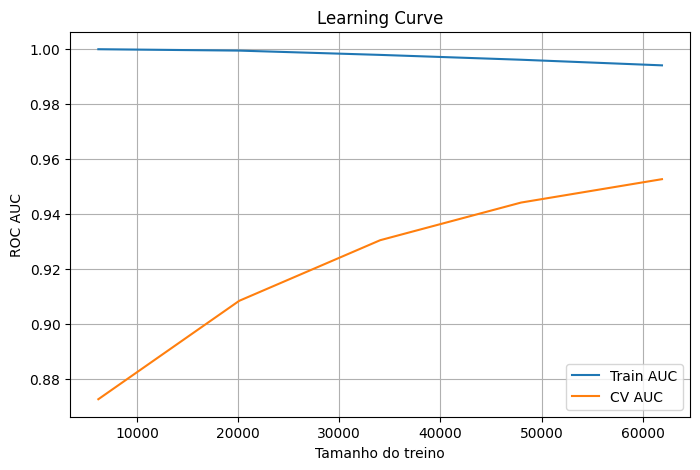

<Figure size 600x800 with 0 Axes>

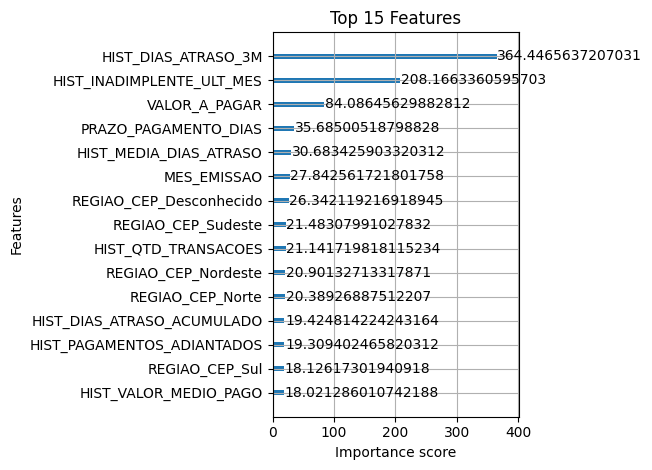

In [ ]:

# 2. Gap treino vs teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
y_train_proba = model.predict_proba(X_train)[:,1]
y_test_proba  = model.predict_proba(X_test)[:,1]
print("ROC AUC (treino):", roc_auc_score(y_train, y_train_proba))
print("ROC AUC (teste):", roc_auc_score(y_test, y_test_proba))

# 3. Cross‑validation stratificado
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=skf, scoring='roc_auc', n_jobs=-1)
print("CV ROC AUC 5‑fold:", np.round(cv_scores, 6))
print("Média ± std:", cv_scores.mean(), "±", cv_scores.std())

# 4. Curva de learning (roc_auc)
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y,
    cv=skf,
    scoring='roc_auc',
    train_sizes=np.linspace(0.1,1.0,5),
    n_jobs=-1
)
train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, label='Train AUC')
plt.plot(train_sizes, val_mean,   label='CV AUC')
plt.xlabel('Tamanho do treino')
plt.ylabel('ROC AUC')
plt.legend()
plt.title('Learning Curve')
plt.grid(True)
plt.savefig('../reports/images/learning_curve.png')
print("Learning curve salva em learning_curve.png")

# 5. Feature importance
plt.figure(figsize=(6,8))
plot_importance(model, max_num_features=15, importance_type='gain')
plt.title('Top 15 Features')
plt.tight_layout()
plt.savefig('../reports/images/feature_importance.png')
print("Feature importance salva em feature_importance.png")

In [20]:
#O modelo demonstra uma excelente capacidade de identificar 
#inadimplentes (Recall de 0.94), minimizando perdas financeiras. Embora tenha uma precisão moderada para inadimplentes 
#(0.61), gerando alguns falsos positivos, sua alta acurácia (0.95) e ROC AUC (0.95 no teste), 
#confirmadas pela estabilidade do CV (0.953 ± 0.002), mostram uma robusta generalização. A Precision-Recall AUC (0.87) 
#também é forte para dados desbalanceados. O desempenho é muito promissor, priorizando a identificação de riscos.

#Podemos tentar melhorar o modelo com algumas estratégias, vamos tentar fazer isso no proximo script

model.save_model('../models/xgb_inadimplencia_v1.json')